In [21]:
%load_ext autoreload
%autoreload 2

import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv("../../azimuth.env")

# Add PATH_ROOT to Python path
import sys
sys.path.append(os.getenv("PATH_ROOT"))

print(f'Project path: {os.getenv("PATH_ROOT")}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project path: C:\\Users\\hoangdth\\alpha-azimuth


In [22]:
from MARTINI.airspace.conflict import check_conflicts


In [36]:
import numpy as np
from MARTINI.definitions.trajectory import Trajectory

def create_intersecting_trajectories():
    # Create first trajectory
    waypoints1 = np.array([
        [47.0, 8.0],    # Starting point
        [47.5, 8.5],    # Middle point
        [48.0, 9.0]     # End point
    ])
    
    # Constant altitude and speed for simplicity
    altitudes1 = [30000, 30000, 30000]  # feet
    speeds1 = [0.25, 0.25, 0.25]        # km/s (~900 km/h)
    
    # Create second trajectory by rotating the first one
    # Find midpoint (center of rotation)
    midpoint = waypoints1[1]
    
    # Rotation angle (15 degrees)
    angle = np.radians(15)
    
    # Create rotation matrix
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    
    # Rotate points around midpoint
    waypoints2 = np.array([
        rotate_point(p, midpoint, rotation_matrix)
        for p in waypoints1
    ])

    waypoints2 = np.array([
        [47.0, 8.0],    # Starting point
        [47.5, 8.5],    # Middle point
        [48.0, 9.0]     # End point
    ])
    
    # Create trajectory objects
    traj1 = Trajectory(waypoints1, altitudes1, speeds1, 'H', t0 = 0)
    traj2 = Trajectory(waypoints2, altitudes1, speeds1, 'H', t0 = 0)
    
    return traj1, traj2

def rotate_point(point, center, rotation_matrix):
    # Translate point to origin
    translated = point - center
    # Rotate
    rotated = rotation_matrix @ translated
    # Translate back
    return rotated + center

traj1, traj2 = create_intersecting_trajectories()
    

In [39]:
conflicts = check_conflicts([traj1, traj2])
print(conflicts)


[]


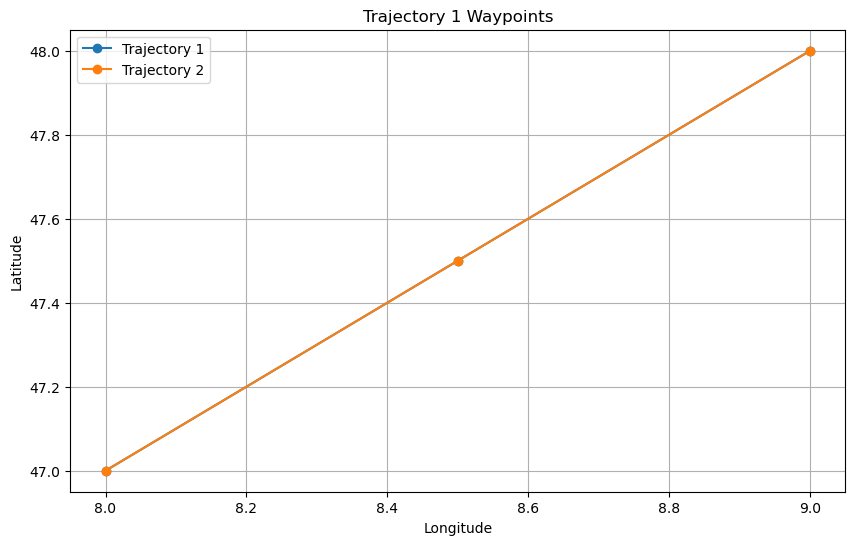

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(traj1.waypoints[:, 1], traj1.waypoints[:, 0], marker='o', label='Trajectory 1')
plt.plot(traj2.waypoints[:, 1], traj2.waypoints[:, 0], marker='o', label='Trajectory 2')
plt.title('Trajectory 1 Waypoints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()